### Covid19-Datenvisualisierung
In diesem Projekt werden Covid19-Daten aus verschieden Ländern (besonders Italien und Deutschland) verwendet. Mit Hilfe von Datenvisualisierungstechniken werden eigene analytischen Fragen beantwortet. Zuerst werden die Datensatz vorbereitet, dann werden folgende Punkten untersucht: 

1. Wie sieht die globale Ausbreitung des Virus aus?
2. Wie intensiv war die Verbreitung des Virus in den Ländern?
3. Haben die nationalen Sperren und Selbstisolationen von Covid19 in verschiedenen Ländern tatsächlich Auswirkungen auf die Übertragung von COVID19?
4. Visualisierung der Auswirkungen der nationalen Sperrung in Italien auf die Sterberate.

Die Datenset stammt aus der URL https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv
Die Daten zeigen die Verbreitung von COVID19 vom Pandemiefreien Tag bis Datum. Diese Datenset wird täglisch aktualisiert.

Die Datenset beihaltet 4 Spalten für jedes Land die Zahl der Tote, Infiziert und Genessen, sowie das Datum, wann die Daten aufgenommen wurden.
 
Um die Fragen zu beantworten, wird in diesen Projekt das Plotly-Modul von Python verwendet, um ein intuitives Diagramm zu erstellen.

## Projektaufbau:

Einführung Importieren des Auto-Update-Datasets mit der Github-URL

Erstellen einer Choroplethenkarte, um die globale Ausbreitung des Virus zu visualisieren

Erstellen eines Balkendiagramms zum Vergleich von Ländern hinsichtlich der Intensität der COVID19-Übertragung

Visualisierung der Ausbreitung des Virus vor und nach der Sperrung in Italien


In [14]:
##import von den Module

from IPython.display import Image
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt 
print('modules sind importiert')

modules sind importiert


In [15]:
##Dataset Wird geladen
dataset_url = 'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv'
df = pd.read_csv(dataset_url)
print('dataset geladen')

dataset geladen


In [16]:
##dataframe
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [17]:
df.tail()

,Date,Country,Confirmed,Recovered,Deaths
121870,2021-10-03,Zimbabwe,131129,0,4627
121871,2021-10-04,Zimbabwe,131129,0,4627
121872,2021-10-05,Zimbabwe,131205,0,4627
121873,2021-10-06,Zimbabwe,131434,0,4630
121874,2021-10-07,Zimbabwe,131523,0,4631


In [18]:
## shape
df.shape

(121875, 5)

In [19]:
df.size

609375

<p>Es wird in allen Ländern untersucht, wie viele Menschen infiziert wurden.
<br>Die bestätigte Spalte(Confirmed) wird größer als Null gesetze.<p>



In [20]:
df = df[df.Confirmed > 0]
df.head()

,Date,Country,Confirmed,Recovered,Deaths
33,2020-02-24,Afghanistan,5,0,0
34,2020-02-25,Afghanistan,5,0,0
35,2020-02-26,Afghanistan,5,0,0
36,2020-02-27,Afghanistan,5,0,0
37,2020-02-28,Afghanistan,5,0,0


Daten aus Italien

In [21]:
df[df.Country == 'Italy'].head()


,Date,Country,Confirmed,Recovered,Deaths
53134,2020-01-31,Italy,2,0,0
53135,2020-02-01,Italy,2,0,0
53136,2020-02-02,Italy,2,0,0
53137,2020-02-03,Italy,2,0,0
53138,2020-02-04,Italy,2,0,0


 Covid19 weltweit Ausbreitung von 2020-02-24 (Alle Fälle, die bestätigt wurden)

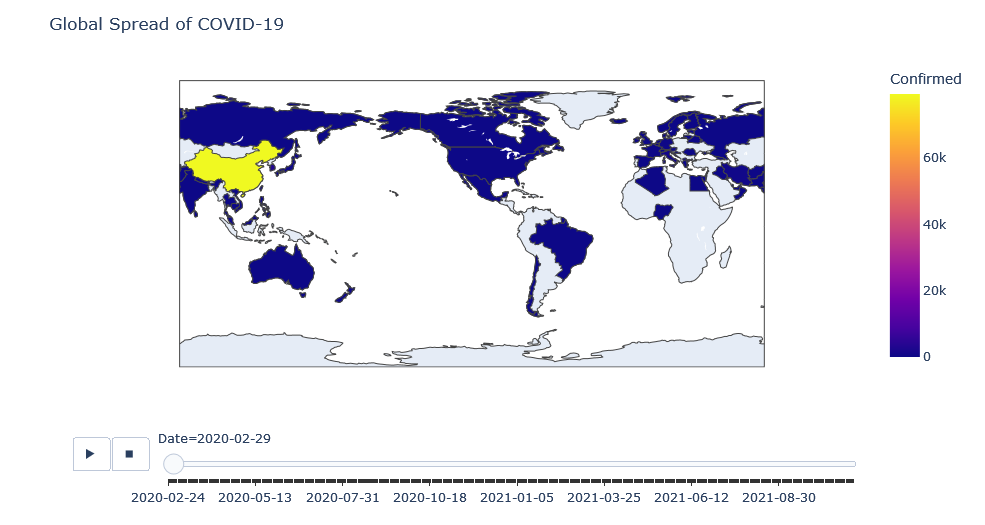

In [22]:
fig = px.choropleth(df , locations = 'Country' , locationmode='country names',color='Confirmed'
                   ,animation_frame='Date')
fig.update_layout(title_text = 'Global Spread of COVID-19')


Image(filename='C:/Users/User.HP/covid/newplot.png') 

 Covid19 weltweit Ausbreitung ein Monat später (Alle Fälle, die bestätigt wurden)

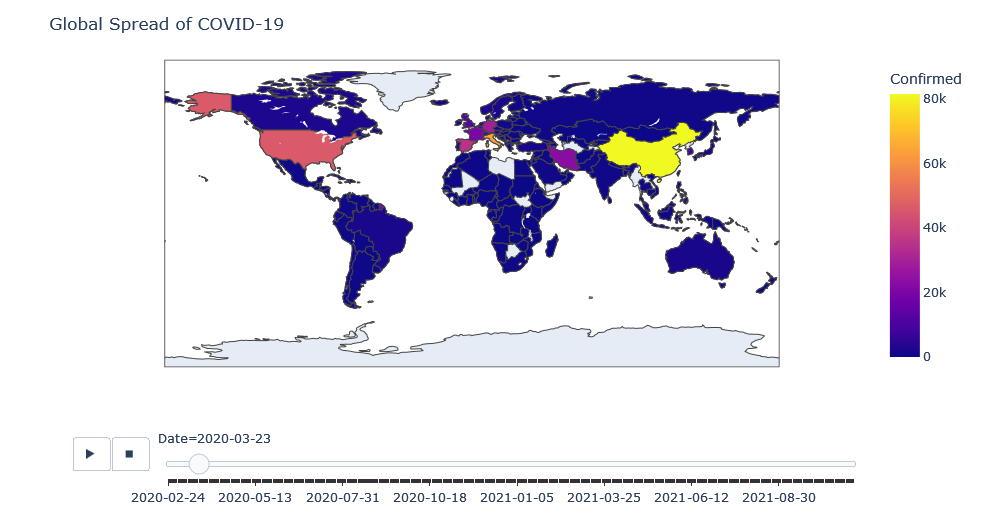

In [25]:
fig = px.choropleth(df , locations = 'Country' , locationmode='country names',color='Confirmed'
                   ,animation_frame='Date')
fig.update_layout(title_text = 'Global Spread of COVID-19')

Image(filename='C:/Users/User.HP/covid/1newplot.png') 

<p>Die weltweiten Todesfälle von COVID19.
<br>Ab dem ersten Tag der Pandemie.<p>


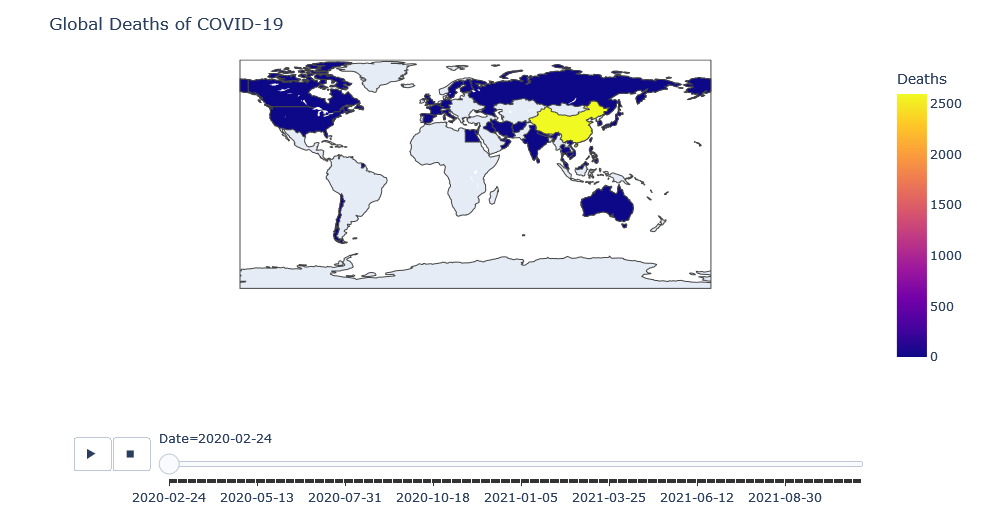

In [26]:
fig = px.choropleth(df , locations = 'Country' , locationmode='country names',color='Deaths'
                   ,animation_frame='Date')
fig.update_layout(title_text = 'Global Deaths of COVID-19')

Image(filename='C:/Users/User.HP/covid/2newplot.png') 

Die Visualizierung wie intensiv die Covid19-Übertragung in China war.
Dafür wird die maximale Infektionsrate bzw. maximale Anzahl neu infizierter Fälle
über 24 Stunden benutzt.

Am 2020-01-22 sind 548 Fälle, 24 Stunden später am 2020-02-643 sind 643 Fälle bestätigt.
In 24 Stunden sind 95 neue Fälle dazu gekommen.


In [28]:
df_china = df[df.Country == 'China']
df_china.head()

,Date,Country,Confirmed,Recovered,Deaths
22500,2020-01-22,China,548,28,17
22501,2020-01-23,China,643,30,18
22502,2020-01-24,China,920,36,26
22503,2020-01-25,China,1406,39,42
22504,2020-01-26,China,2075,49,56


Berechung für Infektionsrate in China über die gesamte Periode 


In [29]:
df_china = df_china[['Date','Confirmed']]

In [30]:
df_china.head()

,Date,Confirmed
22500,2020-01-22,548
22501,2020-01-23,643
22502,2020-01-24,920
22503,2020-01-25,1406
22504,2020-01-26,2075


In [31]:
df_china['Infection Rate'] = df_china['Confirmed'].diff()

In [32]:
df_china.head()

,Date,Confirmed,Infection Rate
22500,2020-01-22,548,NaN
22501,2020-01-23,643,95.0
22502,2020-01-24,920,277.0
22503,2020-01-25,1406,486.0
22504,2020-01-26,2075,669.0


Visualisierung von der Infektionsrate in China:

- Die blaue Linie ist die kumulative Anzahl der bestätigten Fällen auf der roten Linie ist die Infektionsrate.

- Die Größte Zahl der Neuinfektionen war am 2020-02-13 mit 15136.0 neu Fälle.


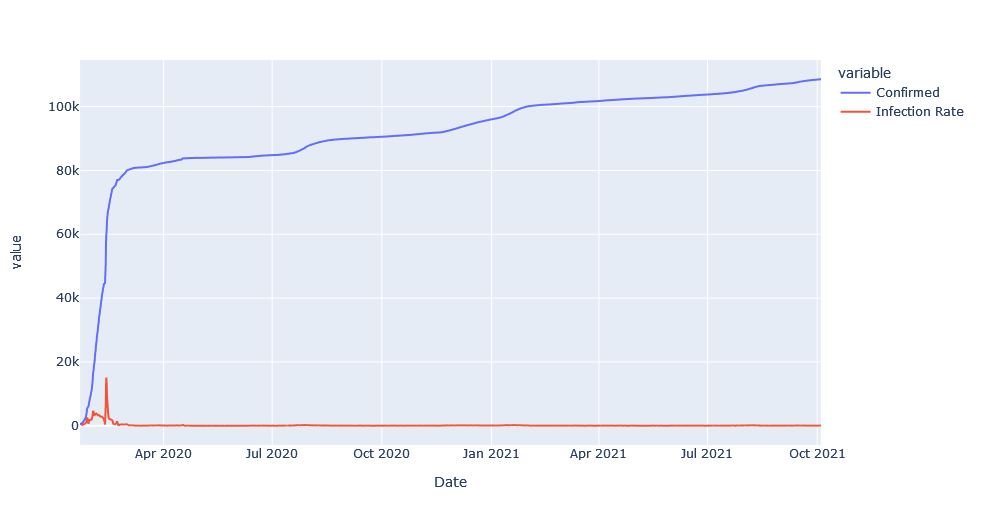

In [33]:
px.line(df_china , x = 'Date' , y = ['Confirmed','Infection Rate'])
Image(filename='C:/Users/User.HP/covid/3newplot.png') 

Diese Zahl beschreibet, wie massiv COVID19 sich  in China verbreitet, also in einem Tag wurden 15136.0 neu Fälle gemeldet


In [34]:
df_china['Infection Rate'].max()

15136.0

Maximum Infektionsrate alle andere Länder 

In [35]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths
33,2020-02-24,Afghanistan,5,0,0
34,2020-02-25,Afghanistan,5,0,0
35,2020-02-26,Afghanistan,5,0,0
36,2020-02-27,Afghanistan,5,0,0
37,2020-02-28,Afghanistan,5,0,0


Berechung für jedes Land mit dem maximale Infektionrat

MIR sind die Infektionsrate.

In [36]:
countries = list(df['Country'].unique())
max_infection_rates = []
for c in countries :
    MIR = df[df.Country == c].Confirmed.diff().max()
    max_infection_rates.append(MIR)

Erzeugung von einem neuen Dataframe mit Ländername und maximalen Infektionsrate

In [37]:
df_MIR = pd.DataFrame()
df_MIR['Country'] = countries
df_MIR['Max Infection Rate'] = max_infection_rates
df_MIR.head()

,Country,Max Infection Rate
0,Afghanistan,3243.0
1,Albania,1239.0
2,Algeria,1927.0
3,Andorra,299.0
4,Angola,1493.0


<p>Ein Balkendiagramm wird gezeichnet, um den Unterschied zwischen verschiedenen Ländern in Bezug auf die maximale Infektionsrate zu zeigen.<p>
   


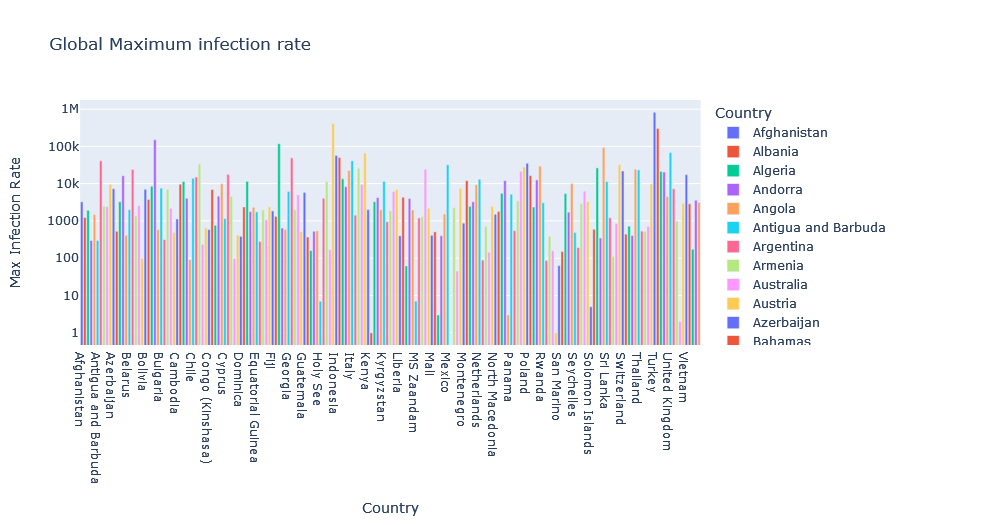

In [38]:
px.bar(df_MIR, x='Country' , y='Max Infection Rate', color = 'Country' , title ='Global Maximum infection rate', log_y=True)


Image(filename='C:/Users/User.HP/covid/4newplot.png') 

### Frage:
Wie beeinflusst die COVID19 nationale Sperren in Italien die Verbreitung des Virus?

Am 9. März 2020 hat die italienische Regierung unter Premierminister Giuseppe Conte als Reaktion auf die wachsende COVID-19-Pandemie im Land eine nationale Quarantäne verhängt, die die Bewegungsfreiheit der Bevölkerung mit Ausnahme von Notwendigkeiten, Arbeits- und Gesundheitsbedingungen einschränkte <a href="https://en.wikipedia.org/wiki/COVID-19_pandemic_lockdown_in_Italy#:~:text=On%209%20March%202020%2C%20the,COVID%2D19%20in%20the%20country.">source</a>


In [39]:
italy_lockdown_start_date = '2020-03-09'
italy_lockdown_a_month_later = '2020-04-09'

In [40]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths
33,2020-02-24,Afghanistan,5,0,0
34,2020-02-25,Afghanistan,5,0,0
35,2020-02-26,Afghanistan,5,0,0
36,2020-02-27,Afghanistan,5,0,0
37,2020-02-28,Afghanistan,5,0,0


Ein Dataframe nur mit Daten aus Italien

In [41]:
df_italy = df[df.Country == 'Italy']

In [42]:
df_italy.head()

,Date,Country,Confirmed,Recovered,Deaths
53134,2020-01-31,Italy,2,0,0
53135,2020-02-01,Italy,2,0,0
53136,2020-02-02,Italy,2,0,0
53137,2020-02-03,Italy,2,0,0
53138,2020-02-04,Italy,2,0,0


Berechung der Infenkitionrate aus Italien

In [43]:
df_italy['Infection Rate'] = df_italy.Confirmed.diff()
df_italy.head()

C:\Users\User.HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Date,Country,Confirmed,Recovered,Deaths,Infection Rate
53134,2020-01-31,Italy,2,0,0,NaN
53135,2020-02-01,Italy,2,0,0,0.0
53136,2020-02-02,Italy,2,0,0,0.0
53137,2020-02-03,Italy,2,0,0,0.0
53138,2020-02-04,Italy,2,0,0,0.0


Visualisierung mit einem Plot-Liniendiagramm
- Die rote Linie repräsentiert der Anfang des Lockdown
- Die Orange Linie repräsentiert das Ende des Lockdown

Einige Monate nach dem Lockdow in Italien am 23.06.2020 wurde der niedriger Infenktionsrat von 113 gezeigt.

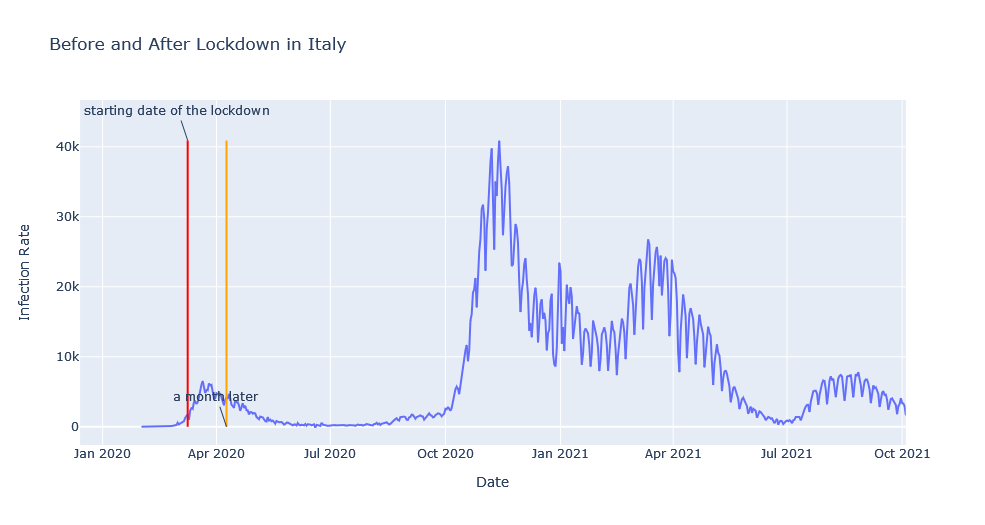

In [44]:
fig = px.line(df_italy , x = 'Date' , y = 'Infection Rate' , title = "Before and After Lockdown in Italy")
fig.add_shape(
    dict(
    type="line",
    x0=italy_lockdown_start_date,
    y0=0,
    x1=italy_lockdown_start_date,
    y1= df_italy['Infection Rate'].max(),
    line = dict(color='red' , width=2)

    )

)
fig.add_annotation(
     dict(
     x = italy_lockdown_start_date,
     y = df_italy['Infection Rate'].max(),
     text = 'starting date of the lockdown'  
     )
)
fig.add_shape(
    dict(
    type="line",
    x0=italy_lockdown_a_month_later,
    y0=0,
    x1=italy_lockdown_a_month_later,
    y1= df_italy['Infection Rate'].max(),
    line = dict(color='orange' , width=2)

    )

)
fig.add_annotation(
     dict(
     x = italy_lockdown_a_month_later,
     y = 0,
     text = 'a month later'  
     )
)


Image(filename='C:/Users/User.HP/covid/5newplot.png') 

### Wie wirkt die nationale Sperren auf die Covid19-Todesrate in Italien aus?

In [45]:
df_italy.head()

,Date,Country,Confirmed,Recovered,Deaths,Infection Rate
53134,2020-01-31,Italy,2,0,0,NaN
53135,2020-02-01,Italy,2,0,0,0.0
53136,2020-02-02,Italy,2,0,0,0.0
53137,2020-02-03,Italy,2,0,0,0.0
53138,2020-02-04,Italy,2,0,0,0.0


Eine Spalte für Sterberate wurde in einen neuen Array berechnet.

In [46]:
df_italy['Deaths Rate'] = df_italy.Deaths.diff()

C:\Users\User.HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [47]:
df_italy.head()

,Date,Country,Confirmed,Recovered,Deaths,Infection Rate,Deaths Rate
53134,2020-01-31,Italy,2,0,0,NaN,NaN
53135,2020-02-01,Italy,2,0,0,0.0,0.0
53136,2020-02-02,Italy,2,0,0,0.0,0.0
53137,2020-02-03,Italy,2,0,0,0.0,0.0
53138,2020-02-04,Italy,2,0,0,0.0,0.0


Liniendiagramm, um die Auswirkungen der nationalen Sperren von COVID19 auf die Ausbreitung des Virus und die Sterblichkeitsrate zu vergleichen

- Die blaue Linie ist die Infektionsrate und
- Rote Linie ist die Sterberate.


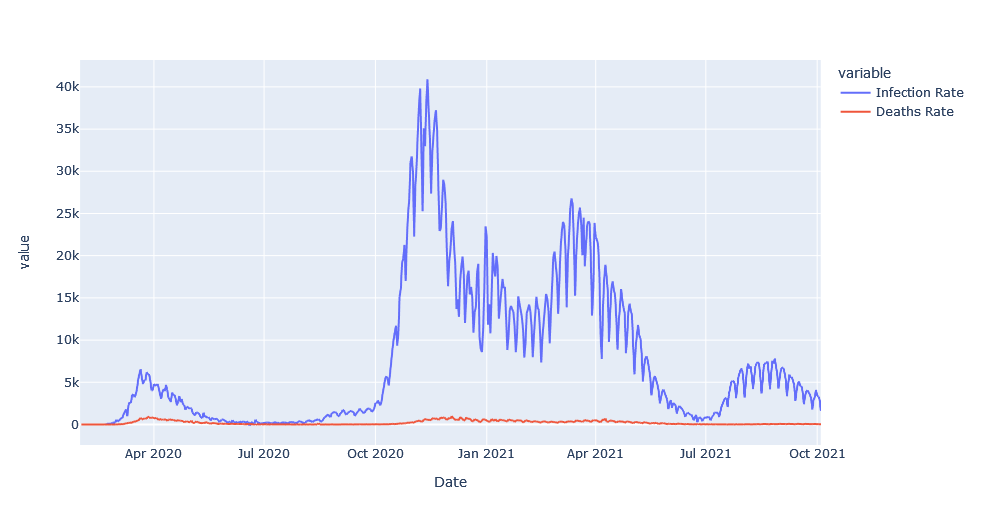

In [48]:
fig = px.line(df_italy,x='Date',y=['Infection Rate','Deaths Rate'])

Image(filename='C:/Users/User.HP/covid/6newplot.png') 

<p>Die Zahl der Todesfälle ist viel niedriger als die Zahl der bestätigten Fälle.
<br>Um sie besser zu vergleichen werden die Zahlen normalisieren, also jeden Wert wird zwischen null und eins sein.<p>



In [49]:
df_italy['Infection Rate'] = df_italy['Infection Rate']/df_italy['Infection Rate'].max()
df_italy['Deaths Rate'] = df_italy['Deaths Rate']/df_italy['Deaths Rate'].max()

C:\Users\User.HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\User.HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



<p>Liniendiagramm mit normalisierten Zahlen.
<br>Nach dem Liniendiagramm ist die Totesrate nach dem Lockdow drastisch abgestiegen, im Vergleich mit der Zeit ohne Lockdow<p>
    
Die COVID19-Lockdown war in Italien wirksam.


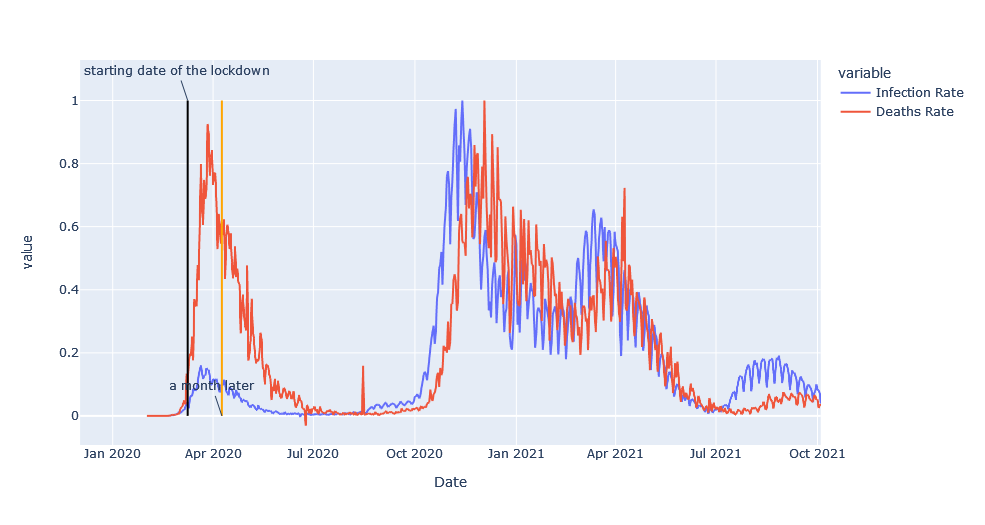

In [50]:
fig = px.line(df_italy, x='Date', y=['Infection Rate','Deaths Rate'])
fig.add_shape(
    dict(
    type="line",
    x0=italy_lockdown_start_date,
    y0=0,
    x1=italy_lockdown_start_date,
    y1= df_italy['Infection Rate'].max(),
    line = dict(color='black' , width=2)

    )

)
fig.add_annotation(
     dict(
     x = italy_lockdown_start_date,
     y = df_italy['Infection Rate'].max(),
     text = 'starting date of the lockdown'  
     )
)
fig.add_shape(
    dict(
    type="line",
    x0=italy_lockdown_a_month_later,
    y0=0,
    x1=italy_lockdown_a_month_later,
    y1= df_italy['Infection Rate'].max(),
    line = dict(color='orange' , width=2)

    )

)
fig.add_annotation(
     dict(
     x = italy_lockdown_a_month_later,
     y = 0,
     text = 'a month later'  
     )
)


Image(filename='C:/Users/User.HP/covid/7newplot.png') 